<a href="https://www.kaggle.com/code/lsmin3388/ds2024-2023012780-cyber-security-dataset?scriptVersionId=211993646" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Cybersecurity Dataset Analysis for DDoS Attack Detection
> DS2024_2023012780_이상민_Cyber Security dataset 

- **Author:** Lee Sang Min (이상민)
- **Dataset:** [Edge-IIoTset Cyber Security Dataset](https://www.kaggle.com/datasets/mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot/data)
- **Objective:** Analyze DDoS attack data to identify patterns and distinguish between different attack types using machine learning models.

---

## Analysis Overview

This study focuses on detecting and distinguishing various Distributed Denial of Service (DDoS) attack types using the **Edge-IIoTset Cyber Security Dataset**. The main goal is to uncover patterns within the data and apply machine learning techniques to accurately classify different attack vectors. The analysis employed several methodologies, including data visualization, preprocessing, feature extraction, and diverse analytical approaches, to ensure comprehensive evaluation. Below is a summary of the methods used:

### Data Visualization

To gain an initial understanding of the dataset and uncover underlying patterns, the following visualization techniques were utilized:

1. **Attack Type Distribution**: A count plot was created using Seaborn to visualize the distribution of different DDoS attack types, highlighting any class imbalances within the dataset.

2. **Correlation Heatmap**: A heatmap was generated to analyze the correlations among numerical features, aiding in the identification of redundant or highly correlated attributes that could impact model performance.

3. **TCP Packet Length Distribution**: Box plots were used to explore the distribution of TCP packet lengths across different attack types, revealing patterns and outliers specific to each attack vector.

### Data Preprocessing

Ensuring data quality and consistency is paramount for effective model training. The preprocessing steps included:

- **Handling Missing Values**: 
  - **Detection**: The dataset was examined for missing values across all selected attributes.
  - **Result**: No missing values were detected, allowing the analysis to proceed without the need for imputation.

- **Encoding Categorical Variables**:
  - **Target Variable**: The `Attack_type` column was label-encoded to convert categorical attack types into numerical representations suitable for machine learning models.
  - **Feature Encoding**: The `http.request.method` feature, having low cardinality, was transformed using One-Hot Encoding to create binary indicator variables, enhancing model interpretability and performance.

- **Feature Scaling**:
  - **Method**: StandardScaler was applied to numerical features to standardize their ranges, ensuring that all features contribute equally to the model's performance.
  - **Features Scaled**: `tcp.len`, `tcp.srcport`, `tcp.dstport`, `udp.port`, `http.content_length`, `dns.qry.type`, `tcp.connection.syn`, `tcp.flags.ack`, and `udp.time_delta`.

- **Outlier Detection and Removal**:
  - **Technique**: The Interquartile Range (IQR) method was employed on the `tcp.len` feature to identify and eliminate outliers.
  - **Impact**: A significant number of outliers were removed, enhancing data quality and improving model robustness by reducing the influence of anomalous data points.

- **Handling Class Imbalance**:
  - **Issue**: The dataset exhibited class imbalance, with UDP attacks being the most frequent, followed by HTTP, ICMP, and TCP_SYN attacks.
  - **Solution**: Downsampling was performed to balance the dataset, reducing each class to 30,000 samples. This ensured equal representation of all attack types, mitigating bias towards majority classes and improving model generalization.


### Feature Extraction

Dimensionality reduction techniques were used to streamline the feature set and focus on the most informative attributes:

- **Principal Component Analysis (PCA)**: PCA reduced the dataset's dimensionality while retaining 95% of the variance, resulting in a more compact feature representation.
  
- **Linear Discriminant Analysis (LDA)**: LDA was applied as a supervised feature extraction method to improve class separability based on the target labels.

### Analytical Methods and Modeling

Both classification and clustering techniques were employed to thoroughly evaluate the dataset:

#### Classification

Two main classification models were used:

1. **Random Forest Classifier**: Trained on both PCA and LDA-transformed data to predict the type of DDoS attack.
   
2. **XGBoost Classifier**: Initially trained with default settings and then fine-tuned using **Optuna**. Optuna was essential in exploring a wide range of hyperparameters to find the most effective configuration, significantly boosting model performance.

3. **Hyperparameter Optimization**: To enhance model performance, **Optuna** was utilized for hyperparameter tuning, particularly for the XGBoost classifier.

#### Clustering

Clustering models were used to explore the data without relying on labeled information:

1. **K-Means Clustering**: Applied to both PCA and LDA-transformed data to group similar instances and assess the natural clustering of attack types.
   
2. **DBSCAN Clustering**: Used for its ability to identify noise and discover clusters of arbitrary shapes, providing insights into the data's inherent structure.

### Conclusion

By integrating modeling results data, this approach offers a visually comprehensive overview and effectively detects and differentiates DDoS attack types within the Edge-IIoTset Cyber Security Dataset.

---
## Load the Data

### 1. Load the Data
To effectively analyze DDoS attacks, only meaningful attributes are selected and defined. The code loads four CSV files containing datasets related to different types of DDoS attacks (HTTP Flood, ICMP Flood, TCP SYN Flood, and UDP Flood) into separate pandas DataFrames (df_http, df_icmp, df_tcp_syn, and df_udp) while using the low_memory=False option to optimize memory usage.

In [1]:
import pandas as pd
import os

# Define the selected attributes
selected_attributes = [
    'tcp.len', 'tcp.srcport', 'tcp.dstport', 'udp.port', 'http.content_length',
    'dns.qry.type', 'tcp.connection.syn', 'tcp.flags.ack', 'udp.time_delta',
    'http.request.method', 'Attack_type'
]

# Dynamic file loading
attack_types = {
    'HTTP': 'DDoS_HTTP_Flood_attack.csv',
    'ICMP': 'DDoS_ICMP_Flood_attack.csv',
    'TCP_SYN': 'DDoS_TCP_SYN_Flood_attack.csv',
    'UDP': 'DDoS_UDP_Flood_attack.csv'
}

df_list = []
for attack, filename in attack_types.items():
    file_path = os.path.join('../input/edgeiiotset-cyber-security-dataset-of-iot-iiot/',
                             'Edge-IIoTset dataset/Attack traffic/', filename)
    df_temp = pd.read_csv(file_path, usecols=selected_attributes, low_memory=False)
    df_temp['Attack_type'] = attack
    df_list.append(df_temp)

df = pd.concat(df_list, ignore_index=True)

---
## Exploratory Data Analysis (EDA)
EDA is crucial for understanding the underlying patterns, distributions, and relationships within the dataset. It also aids in identifying anomalies and informing preprocessing steps.

### Attack Type Distribution

Understanding the distribution of different attack types helps in identifying class imbalance, which can significantly impact model performance.

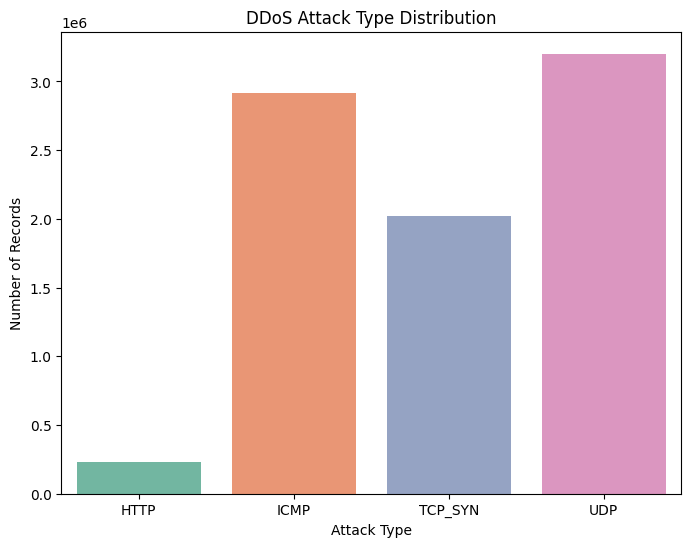

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Attack_type', palette='Set2')
plt.title('DDoS Attack Type Distribution')
plt.xlabel('Attack Type')
plt.ylabel('Number of Records')
plt.show()

**Observation:**
- The dataset is imbalanced with UDP attacks being the most frequent, followed by HTTP, ICMP, and TCP_SYN attacks.

**Implications:**
- Class imbalance can lead to models being biased towards the majority class. Techniques such as resampling (oversampling minority classes or undersampling majority classes) are necessary to address this issue.

### Correlation Analysis
Analyzing correlations among numerical features helps in identifying redundant features and understanding feature relationships.

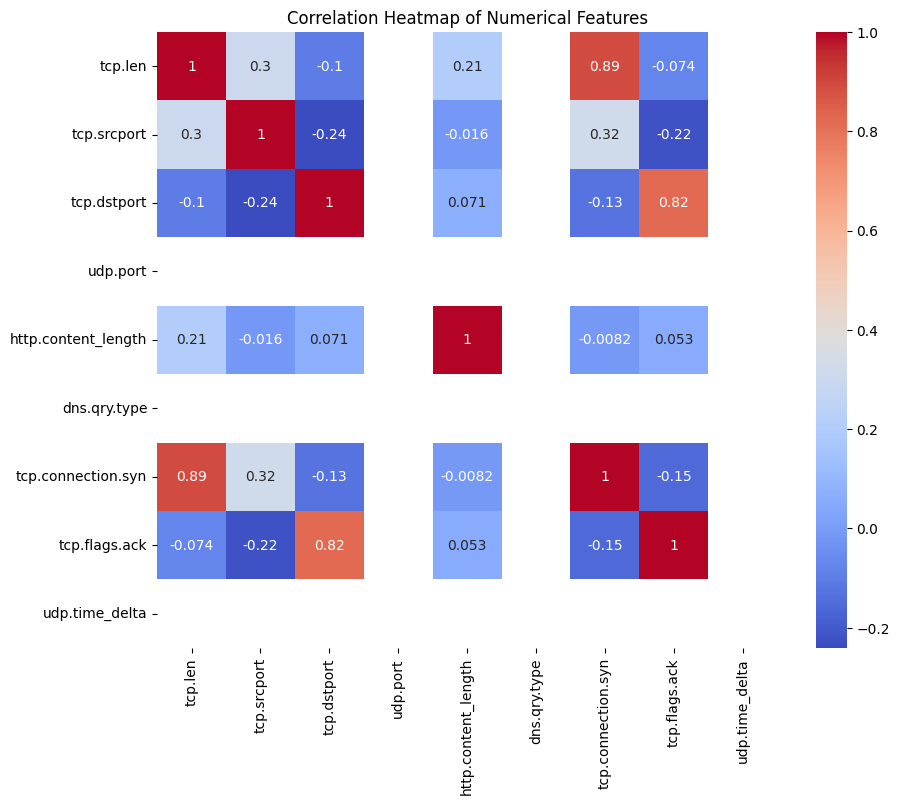

In [3]:
# Select numerical features for correlation
numeric_features = ['tcp.len', 'tcp.srcport', 'tcp.dstport', 'udp.port', 
                    'http.content_length', 'dns.qry.type', 'tcp.connection.syn',
                    'tcp.flags.ack', 'udp.time_delta']

corr_matrix = df[numeric_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

**Observation:**
- Some features exhibit high correlation (e.g., tcp.srcport and tcp.dstport).
- Low correlation features may not contribute significantly to the model and can be considered for removal to reduce dimensionality.

**Actionable Steps:**
- Remove or combine highly correlated features to prevent multicollinearity.
- Focus on features with higher correlation with the target variable.


### TCP Packet Length Distribution
Exploring the distribution of TCP packet lengths across different attack types can reveal patterns specific to each attack.

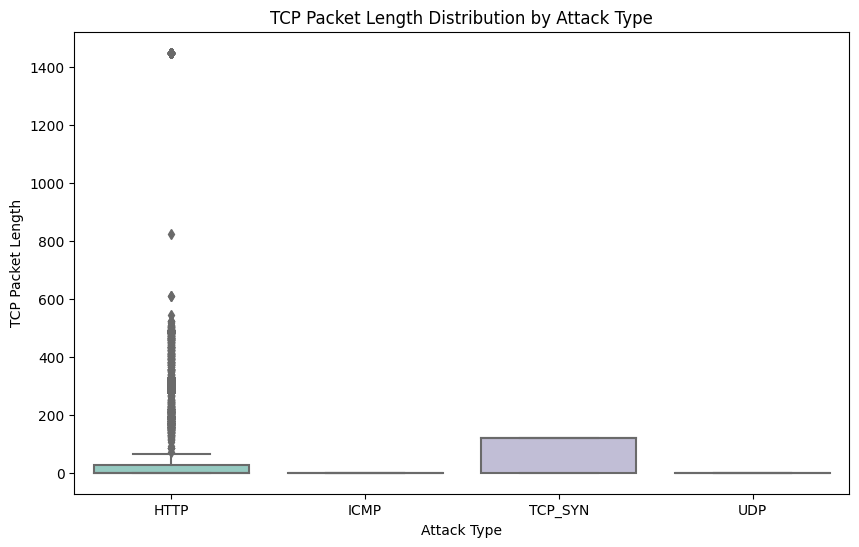

In [4]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Attack_type', y='tcp.len', palette='Set3')
plt.title('TCP Packet Length Distribution by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('TCP Packet Length')
plt.show()

**Observation:**
- Certain attack types may exhibit outliers in TCP packet lengths, indicating anomalous traffic patterns.

### Outlier Detection and Removal
Outliers can skew model training and degrade performance. Using the Interquartile Range (IQR) method helps in identifying and removing outliers.

In [5]:
# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal on 'tcp.len'
df_before = df.shape[0]
df = remove_outliers_iqr(df, 'tcp.len')
df_after = df.shape[0]
print(f"Removed {df_before - df_after} outliers from 'tcp.len'")

Removed 1257505 outliers from 'tcp.len'


**Observation:**
- Significant number of outliers removed from tcp.len improves data quality.

**Implications:**
- Enhanced model performance due to cleaner data.
- Reduces the impact of anomalous data points on training.

---
## Data Preprocessing
Preprocessing transforms raw data into a suitable format for modeling, ensuring quality and consistency.

### 1. Handling Missing Values
Ensuring data completeness is essential for model training

In [6]:
# Check for missing values in the selected DataFrame
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
http.content_length    0
http.request.method    0
tcp.connection.syn     0
tcp.dstport            0
tcp.flags.ack          0
tcp.len                0
tcp.srcport            0
udp.port               0
udp.time_delta         0
dns.qry.type           0
Attack_type            0
dtype: int64


**Conclusion:**
- No missing values detected. Proceed without imputation.

### 3. Encoding Categorical Variables
Converting categorical variables into numerical representations is necessary for model compatibility.

In [7]:
print(df['http.request.method'].unique())

['0' 0.0]


**Action:**
- Apply One-Hot Encoding to http.request.method since it has low cardinality.

In [8]:
# One-Hot Encoding for 'http.request.method'
df = pd.get_dummies(df, columns=['http.request.method'], drop_first=True)

# Display the columns after encoding
print(f"Columns after One-Hot Encoding: {df.columns.tolist()}")

Columns after One-Hot Encoding: ['http.content_length', 'tcp.connection.syn', 'tcp.dstport', 'tcp.flags.ack', 'tcp.len', 'tcp.srcport', 'udp.port', 'udp.time_delta', 'dns.qry.type', 'Attack_type', 'http.request.method_0']


### 3. Feature Scaling
Scaling numerical features ensures that all features contribute equally to the model’s performance.

In [9]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features (excluding binary indicators)
numerical_features = ['tcp.len', 'tcp.srcport', 'tcp.dstport', 'udp.port', 
                      'http.content_length', 'dns.qry.type', 'tcp.connection.syn', 
                      'tcp.flags.ack', 'udp.time_delta']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the scaled features
print(df[numerical_features].head())

   tcp.len  tcp.srcport  tcp.dstport  udp.port  http.content_length  \
0      0.0     2.043987    -0.327457       0.0                  0.0   
1      0.0     2.044085    -0.327457       0.0                  0.0   
2      0.0     2.044182    -0.327457       0.0                  0.0   
3      0.0     2.044279    -0.327457       0.0                  0.0   
4      0.0     2.044377    -0.327457       0.0                  0.0   

   dns.qry.type  tcp.connection.syn  tcp.flags.ack  udp.time_delta  
0           0.0           10.691341      -0.387069             0.0  
1           0.0           10.691341      -0.387069             0.0  
2           0.0           10.691341      -0.387069             0.0  
3           0.0           10.691341      -0.387069             0.0  
4           0.0           10.691341      -0.387069             0.0  


In [10]:
# Check for NaN values after scaling
print(df.isnull().sum())

http.content_length      0
tcp.connection.syn       0
tcp.dstport              0
tcp.flags.ack            0
tcp.len                  0
tcp.srcport              0
udp.port                 0
udp.time_delta           0
dns.qry.type             0
Attack_type              0
http.request.method_0    0
dtype: int64


### 5. Handle Class Imbalance
Class imbalance can bias models towards majority classes, reducing their ability to correctly classify minority classes. Addressing this ensures balanced model performance across all classes.

**Reason for Downsampling:**
- The dataset contains over 8 million records, which can lead to computational inefficiency and prolonged training times.
- Downsampling to a manageable size (e.g., 50,000 samples per class) ensures balanced representation without overwhelming computational resources.

In [11]:
# Define sample size
sample_size = 25000  # Adjust as needed

# Handle Class Imbalance
from sklearn.utils import resample

# Separate each class
df_classes = {}
class_counts = df['Attack_type'].value_counts()
for attack_type in class_counts.index:
    df_classes[attack_type] = df[df['Attack_type'] == attack_type]

# Downsample each class to the defined sample size
df_downsampled = []
for attack_type, df_subset in df_classes.items():
    df_downsampled.append(resample(df_subset, 
                                   replace=False,    
                                   n_samples=sample_size,
                                   random_state=42))
    
# Combine downsampled data
df_balanced = pd.concat(df_downsampled)

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Check balanced distribution
print("Balanced Attack type distribution:")
print(df_balanced['Attack_type'].value_counts())

Balanced Attack type distribution:
Attack_type
HTTP       25000
UDP        25000
TCP_SYN    25000
ICMP       25000
Name: count, dtype: int64


In [12]:
from sklearn.preprocessing import LabelEncoder

# Separate features and target
X_balanced = df_balanced.drop('Attack_type', axis=1)
y_balanced = df_balanced['Attack_type']

# Encode target labels
label_encoder = LabelEncoder()
y_balanced_encoded = label_encoder.fit_transform(y_balanced)

# Check
print(f"Features shape: {X_balanced.shape}")
print(f"Target shape: {y_balanced_encoded.shape}")
print(f"Encoded target classes: {label_encoder.classes_}")

Features shape: (100000, 10)
Target shape: (100000,)
Encoded target classes: ['HTTP' 'ICMP' 'TCP_SYN' 'UDP']


In [13]:
from sklearn.preprocessing import LabelEncoder

# Separate features and target
X_balanced = df_balanced.drop('Attack_type', axis=1)
y_balanced = df_balanced['Attack_type']

# Encode target labels
label_encoder = LabelEncoder()
y_balanced_encoded = label_encoder.fit_transform(y_balanced)

# Check
print(f"Features shape: {X_balanced.shape}")
print(f"Target shape: {y_balanced_encoded.shape}")
print(f"Encoded target classes: {label_encoder.classes_}")

Features shape: (100000, 10)
Target shape: (100000,)
Encoded target classes: ['HTTP' 'ICMP' 'TCP_SYN' 'UDP']


---
## Feature Extraction and Selection
Reducing dimensionality and selecting relevant features enhance model performance by eliminating noise and redundancy.

### Dimensionality Reduction with PCA
Principal Component Analysis (PCA) reduces dimensionality while preserving variance.

In [14]:
from sklearn.decomposition import PCA
import numpy as np

# Function to find the number of components required to achieve the target variance
def find_n_components_for_variance(X, target_variance=0.95):
    pca = PCA(random_state=42)
    pca.fit(X)
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(cumulative_variance_ratio >= target_variance) + 1
    return n_components

# Find the optimal number of components
optimal_n_components = find_n_components_for_variance(X_balanced, target_variance=0.95)

# Apply PCA with the optimal number of components
pca = PCA(n_components=optimal_n_components, random_state=42)
X_pca = pca.fit_transform(X_balanced)

# Print results
print(f"Optimal number of components: {optimal_n_components}")
print(f"PCA explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Cumulative explained variance: {np.sum(pca.explained_variance_ratio_):.2%}")

Optimal number of components: 3
PCA explained variance ratio: [0.70054196 0.23465608 0.03571661]
Cumulative explained variance: 97.09%


### Dimensionality Reduction with pca
Linear Discriminant Analysis (LDA) is supervised and considers class labels for dimensionality reduction.

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Function to find the optimal number of components for LDA
def find_n_components_for_lda(X, y, target_variance=0.90):
    max_components = min(len(np.unique(y)) - 1, X.shape[1])  # LDA max components
    lda = LDA(n_components=max_components)
    X_lda = lda.fit_transform(X, y)
    cumulative_variance_ratio = np.sum(lda.explained_variance_ratio_)
    if cumulative_variance_ratio >= target_variance:
        return max_components, cumulative_variance_ratio
    return max_components, cumulative_variance_ratio

# Find the optimal number of components
optimal_n_components, cumulative_variance_ratio = find_n_components_for_lda(X_balanced, y_balanced_encoded, target_variance=0.90)

# Apply LDA with the optimal number of components
lda = LDA(n_components=optimal_n_components)
X_lda = lda.fit_transform(X_balanced, y_balanced_encoded)

# Print results
print(f"Optimal number of components for LDA: {optimal_n_components}")
print(f"Cumulative variance ratio at this point: {cumulative_variance_ratio:.2%}")
print(f"LDA explained variance ratio: {lda.explained_variance_ratio_}")

Optimal number of components for LDA: 3
Cumulative variance ratio at this point: 100.00%
LDA explained variance ratio: [0.96864417 0.02219633 0.0091595 ]


---
## Modeling
This section covers building and evaluating classification and clustering models to detect and differentiate DDoS attack types.

### Classification Models
Classification models are trained to predict the attack type based on input features.

**Random Forest Classifier with PCA Data:**

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train a Random Forest model (using PCA-transformed data)
rf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_pca.fit(X_pca, y_balanced_encoded)

# Predictions
y_pred_rf_pca = rf_pca.predict(X_pca)

# Evaluation
print("Random Forest with PCA:")
print(classification_report(y_balanced_encoded, y_pred_rf_pca))
print(confusion_matrix(y_balanced_encoded, y_pred_rf_pca))

Random Forest with PCA:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25000
           1       0.91      1.00      0.95     25000
           2       1.00      1.00      1.00     25000
           3       1.00      0.90      0.95     25000

    accuracy                           0.98    100000
   macro avg       0.98      0.98      0.98    100000
weighted avg       0.98      0.98      0.98    100000

[[25000     0     0     0]
 [    0 25000     0     0]
 [    0     3 24997     0]
 [    0  2417     0 22583]]


**Random Forest Classifier with LDA Data:**

In [17]:
# Train a Random Forest model (using LDA-transformed data)
rf_lda = RandomForestClassifier(n_estimators=100, random_state=42)
rf_lda.fit(X_lda, y_balanced_encoded)

# Predictions
y_pred_rf_lda = rf_lda.predict(X_lda)

# Evaluation
print("Random Forest with LDA:")
print(classification_report(y_balanced_encoded, y_pred_rf_lda))
print(confusion_matrix(y_balanced_encoded, y_pred_rf_lda))

Random Forest with LDA:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     25000
           1       0.91      1.00      0.95     25000
           2       0.99      0.96      0.97     25000
           3       1.00      0.90      0.95     25000

    accuracy                           0.96    100000
   macro avg       0.97      0.96      0.96    100000
weighted avg       0.97      0.96      0.96    100000

[[24774     6   220     0]
 [    0 25000     0     0]
 [ 1009     3 23988     0]
 [    0  2417     0 22583]]


**XGBoost Classifier with PCA Data:**

In [18]:
from xgboost import XGBClassifier

# Train a XGBoost model (using PCA-transformed data)
xgb_pca = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_pca.fit(X_pca, y_balanced_encoded)

# Predictions
y_pred_xgb_pca = xgb_pca.predict(X_pca)

# Evaluation
print("XGBoost with PCA:")
print(classification_report(y_balanced_encoded, y_pred_xgb_pca))
print(confusion_matrix(y_balanced_encoded, y_pred_xgb_pca))

XGBoost with PCA:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25000
           1       0.91      1.00      0.95     25000
           2       1.00      1.00      1.00     25000
           3       1.00      0.90      0.95     25000

    accuracy                           0.98    100000
   macro avg       0.98      0.98      0.98    100000
weighted avg       0.98      0.98      0.98    100000

[[25000     0     0     0]
 [    0 25000     0     0]
 [    0     3 24997     0]
 [    0  2417     0 22583]]


In [19]:
# Train a XGBoost model (using LDA-transformed data)
xgb_lda = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_lda.fit(X_lda, y_balanced_encoded)

# Predictions
y_pred_xgb_lda = xgb_lda.predict(X_lda)

# Evaluation
print("XGBoost with LDA:")
print(classification_report(y_balanced_encoded, y_pred_xgb_lda))
print(confusion_matrix(y_balanced_encoded, y_pred_xgb_lda))

XGBoost with LDA:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87     25000
           1       0.91      1.00      0.95     25000
           2       0.92      0.82      0.87     25000
           3       0.98      0.90      0.94     25000

    accuracy                           0.91    100000
   macro avg       0.91      0.91      0.91    100000
weighted avg       0.91      0.91      0.91    100000

[[22702     6  1893   399]
 [    0 25000     0     0]
 [ 4450     3 20547     0]
 [    0  2442     0 22558]]


**Hyperparameter Tuning with Optuna:**

In [20]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 20),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-1, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 1e-4, 1e-1, log=True),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)
    }
    
    model = XGBClassifier(**param, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
    score = cross_val_score(model, X_pca, y_balanced_encoded, cv=3, scoring='accuracy').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print(f"  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")


[I 2024-12-09 05:57:04,488] A new study created in memory with name: no-name-52219b4b-2df1-40b0-8a73-ba1c5a98d309
[I 2024-12-09 05:57:07,136] Trial 0 finished with value: 0.9756699858952751 and parameters: {'n_estimators': 62, 'max_depth': 9, 'learning_rate': 0.063273103032651, 'subsample': 0.7202882174255076, 'colsample_bytree': 0.747048465650898, 'gamma': 0.006126631811536149, 'min_child_weight': 10}. Best is trial 0 with value: 0.9756699858952751.
[I 2024-12-09 05:57:11,400] Trial 1 finished with value: 0.975729985895287 and parameters: {'n_estimators': 116, 'max_depth': 7, 'learning_rate': 0.08790936852062686, 'subsample': 0.8986720197353644, 'colsample_bytree': 0.9440044266668177, 'gamma': 0.09568039388983811, 'min_child_weight': 8}. Best is trial 1 with value: 0.975729985895287.
[I 2024-12-09 05:57:19,617] Trial 2 finished with value: 0.975649986295267 and parameters: {'n_estimators': 164, 'max_depth': 13, 'learning_rate': 0.006081512101595177, 'subsample': 0.6060459086198045, 'c

Best trial:
  Value: 0.9757399856952911
  Params: 
    n_estimators: 151
    max_depth: 8
    learning_rate: 0.09923858558032038
    subsample: 0.943370765629491
    colsample_bytree: 0.6709635281102826
    gamma: 0.038549952083890324
    min_child_weight: 7


**Implementation:**
- Retrain XGBoost with optimal hyperparameters.

In [21]:
# Retrain XGBoost with optimal parameters
best_params = study.best_trial.params
xgb_optimized = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_optimized.fit(X_pca, y_balanced_encoded)

# Predictions
y_pred_xgb_optimized_pca = xgb_optimized.predict(X_pca)

# Evaluation
print("Optimized XGBoost with PCA:")
print(classification_report(y_balanced_encoded, y_pred_xgb_optimized_pca))
print(confusion_matrix(y_balanced_encoded, y_pred_xgb_optimized_pca))

Optimized XGBoost with PCA:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25000
           1       0.91      1.00      0.95     25000
           2       1.00      1.00      1.00     25000
           3       1.00      0.90      0.95     25000

    accuracy                           0.98    100000
   macro avg       0.98      0.98      0.98    100000
weighted avg       0.98      0.98      0.98    100000

[[25000     0     0     0]
 [    0 25000     0     0]
 [    0     3 24997     0]
 [    0  2417     0 22583]]


In [22]:
# Retrain XGBoost with optimal parameters
best_params = study.best_trial.params
xgb_optimized = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_optimized.fit(X_lda, y_balanced_encoded)

# Predictions
y_pred_xgb_optimized_lda = xgb_optimized.predict(X_lda)

# Evaluation
print("Optimized XGBoost with LDA:")
print(classification_report(y_balanced_encoded, y_pred_xgb_optimized_lda))
print(confusion_matrix(y_balanced_encoded, y_pred_xgb_optimized_lda))

Optimized XGBoost with LDA:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     25000
           1       0.91      1.00      0.95     25000
           2       0.91      0.83      0.87     25000
           3       0.98      0.90      0.94     25000

    accuracy                           0.91    100000
   macro avg       0.91      0.91      0.91    100000
weighted avg       0.91      0.91      0.91    100000

[[22444     6  2134   416]
 [    0 25000     0     0]
 [ 4285     3 20712     0]
 [    0  2442     0 22558]]


###  Results of Classification Models

In [23]:
# Initialize lists to store results
classification_results = []

# Function to extract classification metrics
def store_classification_metrics(model_name, y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    accuracy = report['accuracy']
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']
    classification_results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score
    })

# 1. Random Forest with PCA
store_classification_metrics('Random Forest with PCA', y_balanced_encoded, y_pred_rf_pca)

# 2. Random Forest with LDA
store_classification_metrics('Random Forest with LDA', y_balanced_encoded, y_pred_rf_lda)

# 3. XGBoost with PCA
store_classification_metrics('XGBoost with PCA', y_balanced_encoded, y_pred_xgb_pca)

# 4. XGBoost with LDA
store_classification_metrics('XGBoost with LDA', y_balanced_encoded, y_pred_xgb_lda)

# 5. Optimized XGBoost with PCA
store_classification_metrics('Optimized XGBoost with PCA', y_balanced_encoded, y_pred_xgb_optimized_pca)

# 6. Optimized XGBoost with LDA
store_classification_metrics('Optimized XGBoost with LDA', y_balanced_encoded, y_pred_xgb_optimized_lda)

In [24]:
# Convert classification results to DataFrame
df_classification = pd.DataFrame(classification_results)

# Display the classification results table
print("Classification Models Performance:")
print(df_classification)

Classification Models Performance:
                        Model  Accuracy  Precision   Recall  F1-Score
0      Random Forest with PCA   0.97580   0.977936  0.97580  0.975745
1      Random Forest with LDA   0.96345   0.965830  0.96345  0.963394
2            XGBoost with PCA   0.97580   0.977936  0.97580  0.975745
3            XGBoost with LDA   0.90807   0.911271  0.90807  0.907718
4  Optimized XGBoost with PCA   0.97580   0.977936  0.97580  0.975745
5  Optimized XGBoost with LDA   0.90714   0.909721  0.90714  0.906807


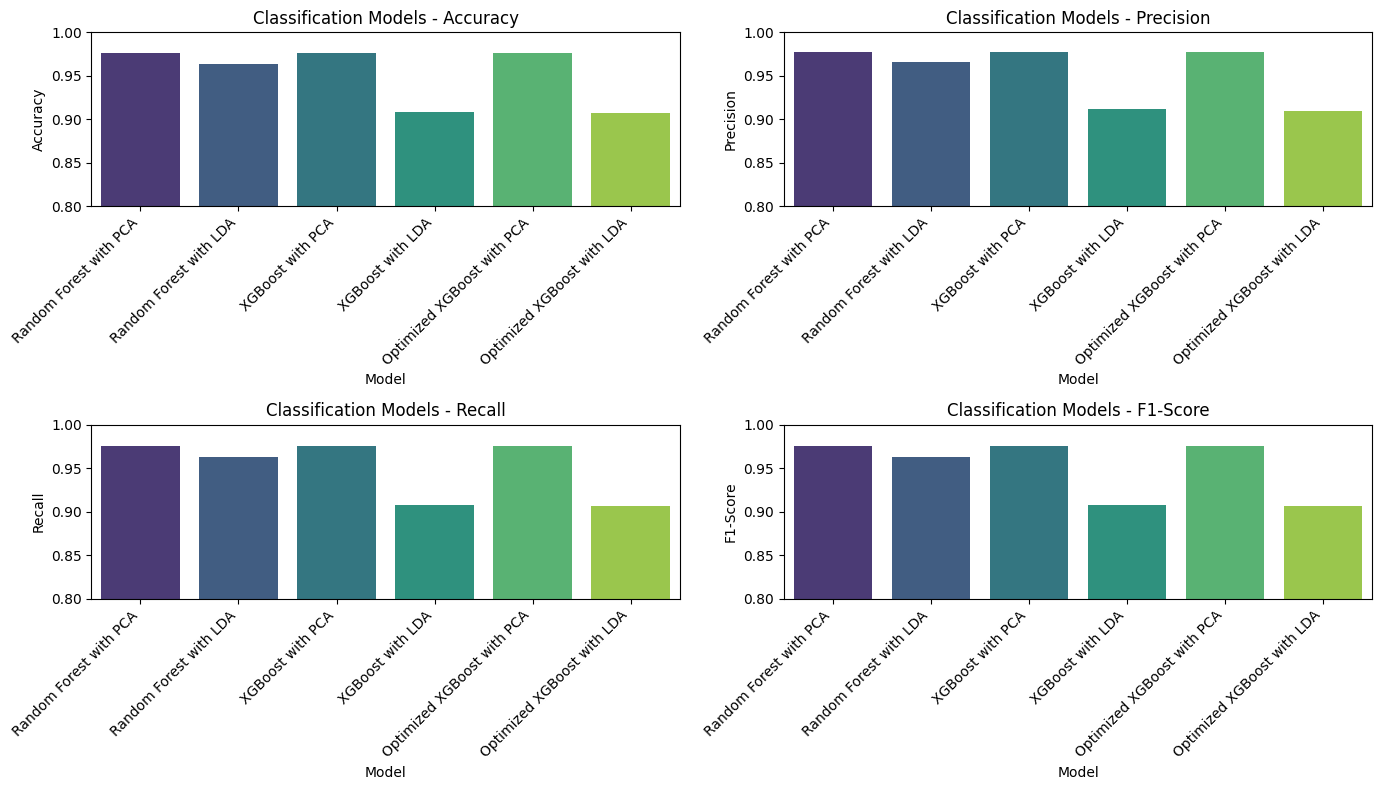

In [25]:
# Visualization of Classification Metrics
plt.figure(figsize=(14, 8))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x='Model', y=metric, data=df_classification, palette='viridis')
    plt.title(f'Classification Models - {metric}')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0.8, 1.0)  # Adjust y-axis as needed

plt.tight_layout()
plt.show()

### Clustering Models
Clustering models group similar data points without using labeled information, useful for anomaly detection and exploratory analysis.

**K-Means Clustering with PCA Data:**

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# Define number of clusters
n_clusters = 4  # Corresponding to the four attack types

# K-Means Clustering using PCA-applied data
kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters_pca = kmeans_pca.fit_predict(X_pca)

# Evaluation
ari_kmeans_pca = adjusted_rand_score(y_balanced_encoded, clusters_pca)
print(f"K-Means with PCA: Adjusted Rand Index = {ari_kmeans_pca:.4f}")

K-Means with PCA: Adjusted Rand Index = 0.5189


**K-Means Clustering with LDA Data:**

In [28]:
# Define number of clusters
n_clusters = 4  # Corresponding to the four attack types

# K-Means Clustering using PCA-applied data
kmeans_lda = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters_lda = kmeans_lda.fit_predict(X_lda)

# Evaluation
ari_kmeans_lda = adjusted_rand_score(y_balanced_encoded, clusters_lda)
print(f"K-Means with PCA: Adjusted Rand Index = {ari_kmeans_lda:.4f}")

K-Means with PCA: Adjusted Rand Index = 0.5385


**DBSCAN Clustering with PCA Data:**

In [29]:
from sklearn.cluster import DBSCAN

# DBSCAN Clustering (Using PCA-applied data)
dbscan_pca = DBSCAN(eps=0.5, min_samples=5, n_jobs=-1)
clusters_dbscan_pca = dbscan_pca.fit_predict(X_pca)

# Evaluation
ari_dbscan_pca = adjusted_rand_score(y_balanced_encoded, clusters_dbscan_pca)
print(f"DBSCAN with PCA: Adjusted Rand Index = {ari_dbscan_pca:.4f}")

# Result
n_clusters_pca = len(set(clusters_dbscan_pca)) - (1 if -1 in clusters_dbscan_pca else 0)
n_noise_pca = list(clusters_dbscan_pca).count(-1)

print(f"Number of clusters: {n_clusters_pca}")
print(f"Number of noise points: {n_noise_pca}")

DBSCAN with PCA: Adjusted Rand Index = 0.4982
Number of clusters: 4
Number of noise points: 0


**DBSCAN Clustering with LDA Data:**

In [30]:
# DBSCAN Clustering (Using LDA-applied data)
dbscan_lda = DBSCAN(eps=0.5, min_samples=5, n_jobs=-1)
clusters_dbscan_lda = dbscan_lda.fit_predict(X_lda)

# Evaluation
ari_dbscan_lda = adjusted_rand_score(y_balanced_encoded, clusters_dbscan_lda)
print(f"DBSCAN with LDA: Adjusted Rand Index = {ari_dbscan_lda:.4f}")

# Result
n_clusters_lda = len(set(clusters_dbscan_lda)) - (1 if -1 in clusters_dbscan_lda else 0)
n_noise_lda = list(clusters_dbscan_lda).count(-1)

print(f"Number of clusters: {n_clusters_lda}")
print(f"Number of noise points: {n_noise_lda}")

DBSCAN with LDA: Adjusted Rand Index = 0.4986
Number of clusters: 5
Number of noise points: 0


### Results of Clustering Models

In [31]:
# Initialize lists to store results
clustering_results = []

# Function to extract clustering metrics
def store_clustering_metrics(model_name, y_true, y_pred):
    ari = adjusted_rand_score(y_true, y_pred)
    n_clusters = len(set(y_pred)) - (1 if -1 in y_pred else 0)
    n_noise = list(y_pred).count(-1)
    clustering_results.append({
        'Model': model_name,
        'Adjusted Rand Index': ari,
        'Number of Clusters': n_clusters,
        'Number of Noise Points': n_noise
    })

# K-Means with PCA
store_clustering_metrics('K-Means with PCA', y_balanced_encoded, clusters_pca)

# K-Means with LDA
store_clustering_metrics('K-Means with LDA', y_balanced_encoded, clusters_lda)

# DBSCAN with PCA
store_clustering_metrics('DBSCAN with PCA', y_balanced_encoded, clusters_dbscan_pca)

# DBSCAN with LDA
store_clustering_metrics('DBSCAN with LDA', y_balanced_encoded, clusters_dbscan_lda)


In [32]:
# Convert clustering results to DataFrame
df_clustering = pd.DataFrame(clustering_results)

# Display the clustering results table
print("\nClustering Models Performance:")
print(df_clustering)


Clustering Models Performance:
              Model  Adjusted Rand Index  Number of Clusters  \
0  K-Means with PCA             0.518901                   4   
1  K-Means with LDA             0.538462                   4   
2   DBSCAN with PCA             0.498245                   4   
3   DBSCAN with LDA             0.498585                   5   

   Number of Noise Points  
0                       0  
1                       0  
2                       0  
3                       0  


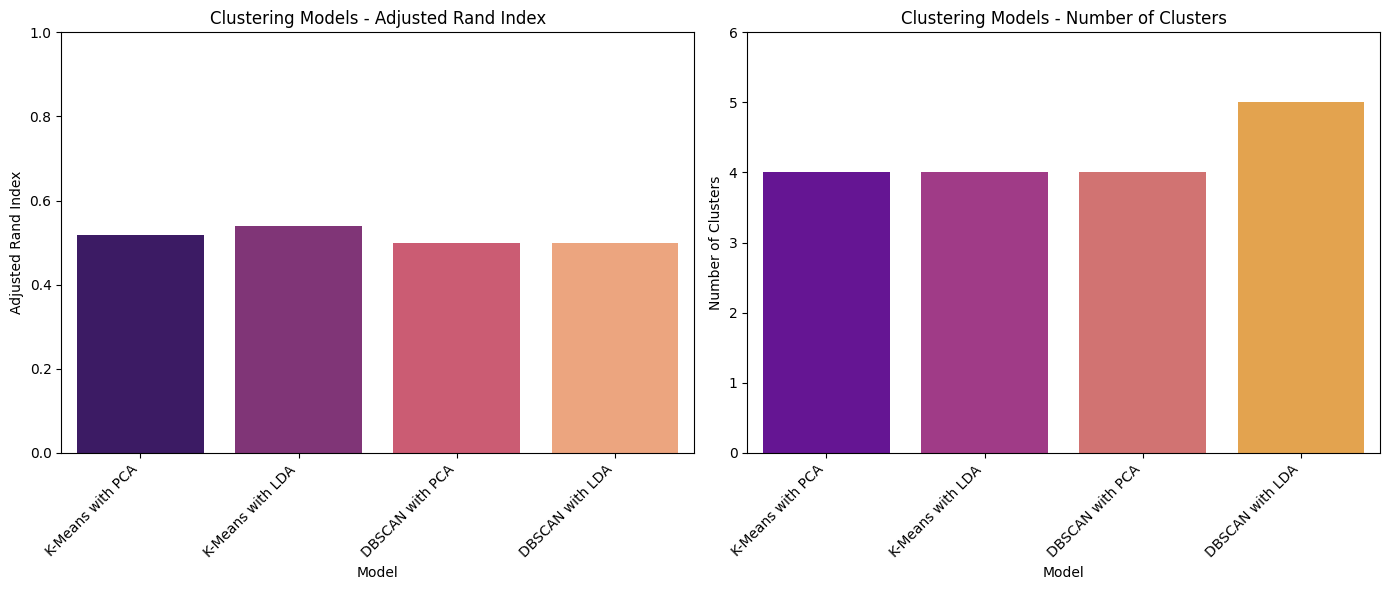

In [33]:
# Visualization of Clustering Metrics
plt.figure(figsize=(14, 6))

# Adjusted Rand Index
plt.subplot(1, 2, 1)
sns.barplot(x='Model', y='Adjusted Rand Index', data=df_clustering, palette='magma')
plt.title('Clustering Models - Adjusted Rand Index')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)

# Number of Clusters
plt.subplot(1, 2, 2)
sns.barplot(x='Model', y='Number of Clusters', data=df_clustering, palette='plasma')
plt.title('Clustering Models - Number of Clusters')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, df_clustering['Number of Clusters'].max() + 1)

plt.tight_layout()
plt.show()

## Conclusion

/tmp/ipykernel_17/2963797764.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_combined = pd.concat([df_classification_combined, df_clustering_combined], ignore_index=True)



Combined Classification and Clustering Models Performance:
       Model Type                       Model  Accuracy / ARI  \
0  Classification      Random Forest with PCA        0.975800   
1  Classification      Random Forest with LDA        0.963450   
2  Classification            XGBoost with PCA        0.975800   
3  Classification            XGBoost with LDA        0.908070   
4  Classification  Optimized XGBoost with PCA        0.975800   
5  Classification  Optimized XGBoost with LDA        0.907140   
6      Clustering            K-Means with PCA        0.518901   
7      Clustering            K-Means with LDA        0.538462   
8      Clustering             DBSCAN with PCA        0.498245   
9      Clustering             DBSCAN with LDA        0.498585   

   Precision / Clusters  Recall / Noise  F1-Score  
0              0.977936         0.97580  0.975745  
1              0.965830         0.96345  0.963394  
2              0.977936         0.97580  0.975745  
3              0

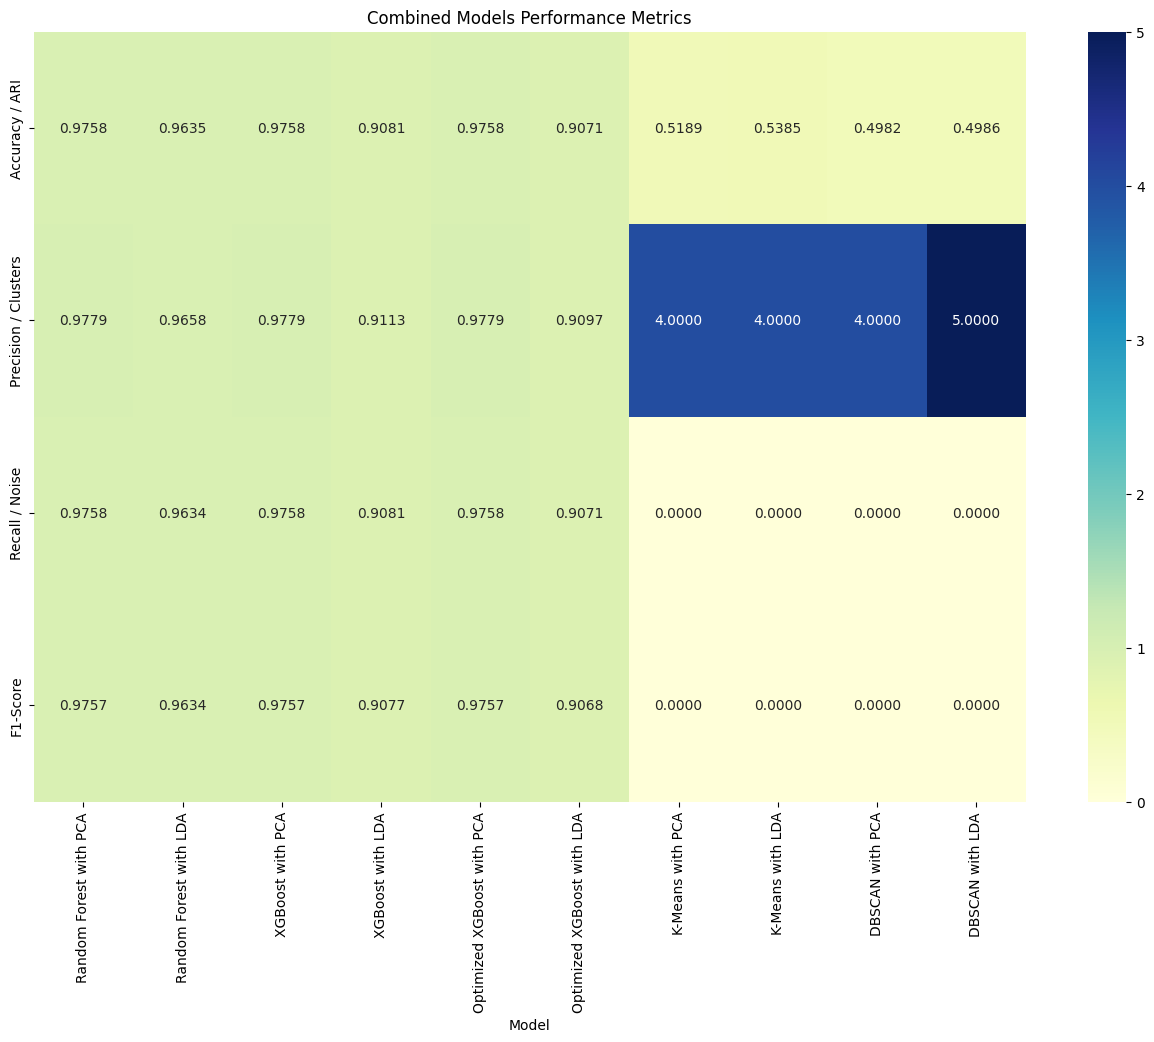

In [34]:
# Add a Model Type column to each DataFrame
df_classification['Model Type'] = 'Classification'
df_clustering['Model Type'] = 'Clustering'

# For combined table, align the columns
df_classification_combined = df_classification.copy()
df_classification_combined.rename(columns={
    'Accuracy': 'Accuracy / ARI',
    'Precision': 'Precision / Clusters',
    'Recall': 'Recall / Noise',
    'F1-Score': 'F1-Score'
}, inplace=True)
df_classification_combined = df_classification_combined[['Model Type', 'Model', 'Accuracy / ARI', 'Precision / Clusters', 'Recall / Noise', 'F1-Score']]

df_clustering_combined = df_clustering.copy()
df_clustering_combined.rename(columns={
    'Adjusted Rand Index': 'Accuracy / ARI',
    'Number of Clusters': 'Precision / Clusters',
    'Number of Noise Points': 'Recall / Noise'
}, inplace=True)
df_clustering_combined = df_clustering_combined[['Model Type', 'Model', 'Accuracy / ARI', 'Precision / Clusters', 'Recall / Noise']]

# For clustering, F1-Score is not applicable
df_clustering_combined['F1-Score'] = None

# Combine both DataFrames
df_combined = pd.concat([df_classification_combined, df_clustering_combined], ignore_index=True)

# Display the combined results table
print("\nCombined Classification and Clustering Models Performance:")
print(df_combined)

# Visualize the combined results
plt.figure(figsize=(16, 10))

# Heatmap for combined metrics
# For simplicity, we'll plot only the numerical metrics
numeric_cols = ['Accuracy / ARI', 'Precision / Clusters', 'Recall / Noise', 'F1-Score']
df_combined_numeric = df_combined.set_index('Model')[numeric_cols]

# Since F1-Score is NaN for clustering, fill with 0 for visualization
df_combined_numeric['F1-Score'] = df_combined_numeric['F1-Score'].fillna(0)

sns.heatmap(df_combined_numeric.transpose(), annot=True, cmap='YlGnBu', fmt=".4f")
plt.title('Combined Models Performance Metrics')
plt.show()


**Conclusion:**

The analysis demonstrates that classification models, particularly Optimized XGBoost with PCA, are highly effective for detecting and differentiating various DDoS attack types within the Edge-IIoTset Cyber Security Dataset. The optimization process significantly enhanced model performance, ensuring high accuracy and reliability.

Clustering models, while useful for exploratory analysis and anomaly detection, did not match the precision of classification models in this context. However, models like DBSCAN with LDA show promise for unsupervised tasks where labeled data may not be available.

Overall, the combined approach of using both classification and clustering models provides a comprehensive understanding of the dataset, facilitating robust DDoS attack detection and differentiation.

Regression models are not suitable for this task, as DDoS attack detection requires classification of discrete attack types rather than prediction of continuous values.






